In [24]:
from DecisionTree import DTLearner
import numpy as np
import timeit
from sklearn.model_selection import train_test_split

In [25]:
strdata=np.loadtxt('fertility.csv', delimiter=',', dtype=str)

In [26]:
#Cleaning up the data
input=strdata[:,0:-1]
input=input.astype('float')
output=strdata[:,-1:]
output[output== 'N'] = 0 #normal fertility is a 0
output[output== 'O'] = 1 #abnormal fertility is 1
output=output.astype('float')

In [33]:
#getting it ready
X_train, X_test, y_train, y_test = train_test_split (input, output)
learner=DTLearner(leaf_size=1)
start=timeit.timeit()
iter= learner.add_evidence(X_train, y_train)
end=timeit.timeit()
time=end-start
yresult=learner.query(X_test)
y_test=y_test.ravel()
error=yresult-y_test
percenerror=abs(sum(error))/(y_test.size)
percenerror

/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.2

In [45]:
#values init
iterations=[]
timevals=[]
errorvals=[]
vals=[0.25, 0.50, 0.75]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output, test_size=val)
    learner=DTLearner(leaf_size=1)
    start=timeit.timeit()
    iter= learner.add_evidence(X_train, y_train)
    end=timeit.timeit()
    time=end-start
    yresult=learner.query(X_test)
    y_test=y_test.ravel()
    error=yresult-y_test
    percenerror=abs(sum(error))/(y_test.size)
    iterations.append(iter)
    timevals.append(time)
    errorvals.append(percenerror)

/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [50]:
import matplotlib.pyplot as plt
iterations


[7, 11, 3]

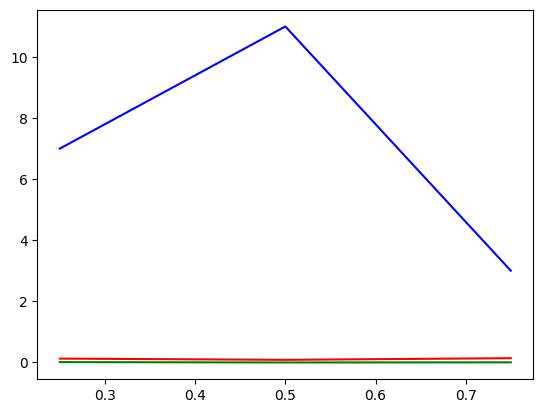

In [60]:
plt.plot(vals, errorvals, 'r')
plt.plot(vals, timevals, 'g')
plt.plot(vals, iterations, 'b')